# Pandas and MatPlotLib Challenge

## Background
---

<p>
You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.
</p>

## Analysis
---
##### Summary

<p>
The dataset analysis reveals that the Capomulin drug regimen is generally effective in reducing tumor size over time. Additionally, there is a significant correlation between mouse weight and tumor size, with larger mice tending to have larger tumors. Among the drug regimens tested, Capomulin and Ramicane stand out as the most effective, consistently achieving the lowest average tumor volumes, while other regimens show results similar to those of the placebo.
</p>

##### Key Findings and Insights

1. The majority of findings from the Capomulin trial indicate that the drug regimen led to a reduction in average tumor size throughout the treatment period.

2. There is a noticeable trend where the average tumor size tends to increase as the weight of the mouse increases, suggesting a strong correlation between these two variables.

3. Capomulin and Ramicane appear to be the most effective drug regimens, consistently showing the lowest average tumor volumes across the dataset, whereas most other treatments show results comparable to the placebo.

In [2]:
#get libaries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rand


In [3]:
#data files
mouse_path_csv = './Resources/Mouse_metadata.csv'
study_results_csv = './Resources/Study_results.csv'


#dataframes
mouse_metadata_df = pd.read_csv(mouse_path_csv)
study_results_df = pd.read_csv(study_results_csv)

#merge the dataframes together on Mouse ID
merged_df = pd.merge(study_results_df, mouse_metadata_df, how='left', on=['Mouse ID', 'Mouse ID'])

print(len(merged_df['Mouse ID'].unique()))

249


<p>Remove duplicate mouse ID timepoint values</p>

In [4]:
#cleaning out duplicate values from merged dataframe
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]['Mouse ID'].unique()

#remove the duplicate mice from the merged dataframe and create a new clean dataframe
clean_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mice)]

print(len(clean_df['Mouse ID'].unique()))

248


<p>Summary Stats using Pandas Series passed into a dataframe</p>

In [5]:
#get drug group
drug_df = clean_df.groupby('Drug Regimen')

#calculate the mean tumor volume for each drug group
mean_tumor_volume = drug_df['Tumor Volume (mm3)'].mean()

#calculate the median tumor volume for each drug group
median_tumor_volume = drug_df['Tumor Volume (mm3)'].median()

#calculate the variance of tumor volume for each drug group
var_tumor_volume = drug_df['Tumor Volume (mm3)'].var()

#calculate the std dev for tumor volume for each drug group
std_tumor_volume = drug_df['Tumor Volume (mm3)'].std()

#calculate the std err for tumor volume for each drug group
sem_tumor_volume = drug_df['Tumor Volume (mm3)'].sem()

#put series into a new dataframe
summary_stats = pd.DataFrame({
    'Mean Tumor Volume':mean_tumor_volume,
    'Median Tumor Volume':median_tumor_volume,
    'Tumor Volume Variance':var_tumor_volume,
    'Tumor Volume Std. Dev.':std_tumor_volume,
    'Tumor Volume Std. Err.':sem_tumor_volume
})

#show the dataframe
summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


##### Summary Stats using .aggregate method from Pandas

In [6]:
#does the same as above, except uses built in aggregrate function with pandas to reduce lines of code and increase efficiency
agg_summary_stats = drug_df['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

#show the aggregate function dataframe
agg_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Charts

##### Pandas .plot Bar Chart
---


<Axes: title={'center': '# of Observed Mice Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mice Timepoints'>

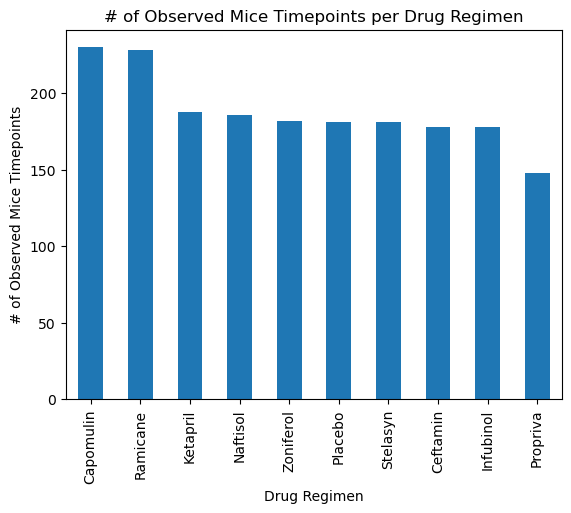

In [7]:

#Chart the count of Mouse IDs off of the grouped drug_df. Then plot the results into a bar chart using pandas .plot
drug_df['Mouse ID'].count().sort_values(ascending=False).plot(kind='bar', 
                                                              title='# of Observed Mice Timepoints per Drug Regimen',
                                                              xlabel='Drug Regimen',
                                                              ylabel='# of Observed Mice Timepoints')


##### MatPlotLib PyPlot Bar Chart
---

Text(0.5, 1.0, '# of Observed Mice Timepoints per Drug Regimen')

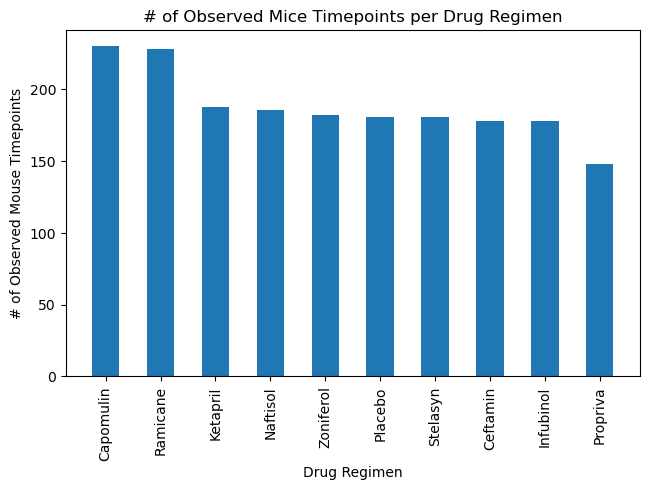

In [9]:
#Get the count of Mouse IDs off of the grouped drug_df. Then plot the results into a bar chart using MatPlotLib.PyPlot
mouse_counts = drug_df['Mouse ID'].count()

#sort the values to make the chart cleaner
mouse_counts = mouse_counts.sort_values(ascending=False)

#plot the chart
plt.bar(np.arange(0,len(mouse_counts),1),mouse_counts, width=.5)
plt.xticks(ticks=np.arange(0,len(mouse_counts),1),labels=mouse_counts.index,rotation=90)
plt.xlabel('Drug Regimen')
plt.tight_layout()
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('# of Observed Mice Timepoints per Drug Regimen')

## Pie Charts


#### Pandas Pie Chart 
---
<p> I want to note, if you calculate with the duplicate mouse ID you get the Pie chart in the Starter Code, if you exclude that record, you get the following</p>

<Axes: title={'center': 'Male vs Female Among Trial mice'}, ylabel='count'>

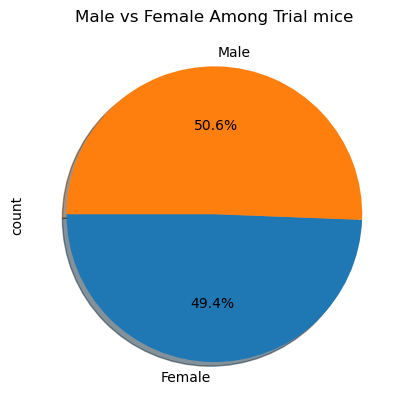

In [11]:
#create groupby series
mouse_gender = merged_df.groupby('Sex')

#plot as a pie chart
mouse_gender['Mouse ID'].count().plot(kind='pie',shadow=True, autopct="%1.1f%%", title='Male vs Female Among Trial mice', startangle=180,ylabel='count')

#### MatPlotLib Pie Chart
---

Text(0, 0.5, 'count')

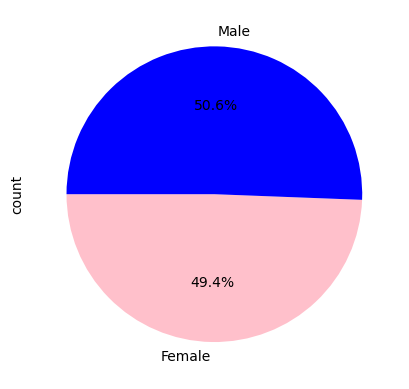

In [12]:
fig,ax = plt.subplots()

#labels for the pie chart is the groupby series index
labels = mouse_gender['Mouse ID'].count().index

#plot pie chart added some extra colors for fun
plt.pie(mouse_gender['Mouse ID'].count(), autopct="%1.1f%%", labels=labels, startangle=180, colors=['pink','blue'])
ax.set_ylabel('count')

## Quartiles, Outliers, and Boxplots

### Boxplot
---

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


Text(0.5, 1.0, 'Final Tumor Volume per Drug Regimen')

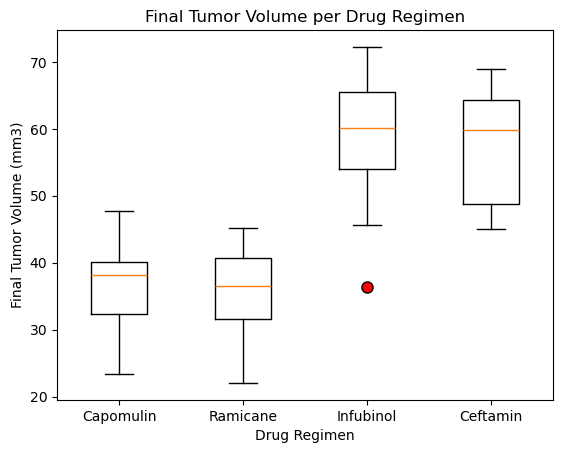

In [13]:
#group by Mouse ID, grab the max timepoint for each Mouse ID
tumor_volume_timepoint_df = pd.DataFrame(merged_df.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint':'Max Timepoint'})

#merge with cleaned dataframe
tumor_volume_df = pd.merge(merged_df,tumor_volume_timepoint_df,on='Mouse ID')

#list of drug names to loop through
drugs = ['Capomulin','Ramicane','Infubinol','Ceftamin']
#empty list to append the values to for the boxplot
values = []


#loops through list of drugs
for drug in drugs:
    #create a temporary dataframe to filter down the the specific drug we are on
    current_drug = tumor_volume_df.loc[tumor_volume_df['Drug Regimen'] == drug]
    
    #Use the temporary dataframe to get only the max timepoint for the current drug.
    final_tp = current_drug.loc[current_drug['Timepoint'] == current_drug['Max Timepoint']]
    
    #declare variable cur_vals, set it to the series of Tumor Volume from our temp DataFrames
    cur_vals = final_tp['Tumor Volume (mm3)']
        
    #append the value to the values list
    values.append(cur_vals)
      
    #calculate quarties, lowerq, upperq, iqr, lower_bound, upper_bound, and outliers
    quartiles = cur_vals.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #create a list of the outliers for each drug
    outliers = [x for x in cur_vals if x > upper_bound or x < lower_bound]
    
    #print out the list of outliers for each drug
    print(f'{drug}\'s potential outliers: {outliers}')



#this allows us to set the properties of the fliers (outliers) of our boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=8,
                  linestyle='none')


#subplot initilization
fig1,ax1 = plt.subplots()
#creating the boxplot, passing is the values list
ax1.boxplot(values,flierprops=flierprops)
#set the labels = drugs list
ax1.set_xticklabels(drugs)
#final formatting for readability
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_title('Final Tumor Volume per Drug Regimen')

## Line Plot and Scatter Plots


Text(0, 0.5, 'Tumor Volume (mm3)')

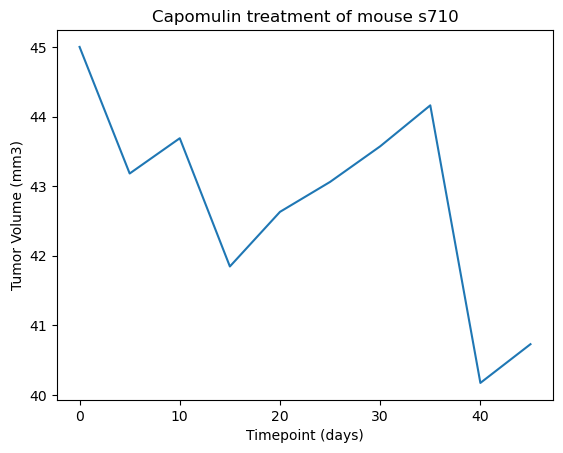

In [21]:
#declare which drug_type we'd like to drill down into
drug_type = 'Capomulin'

#create an array of the unique mouse IDs that exist for that drug
mouse_ids = clean_df.loc[clean_df['Drug Regimen'] == drug_type]['Mouse ID'].unique()

#get random mouse ID from the above array
cur_id = mouse_ids[rand.randint(0,len(mouse_ids) - 1)]

#return only the desired columns for that Mouse's ID
mouse = clean_df.loc[(clean_df['Mouse ID'] == cur_id)][['Tumor Volume (mm3)','Timepoint']]

#plot the mouses data as a line chart. 
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
#title will automaticaly update if the variables above are changed for the drug group and for the mouse ID it's using
plt.title(f'{drug_type} treatment of mouse {cur_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')



Text(0.5, 1.0, 'Mouse Weight (g) vs Average Tumor Volume (mm3)')

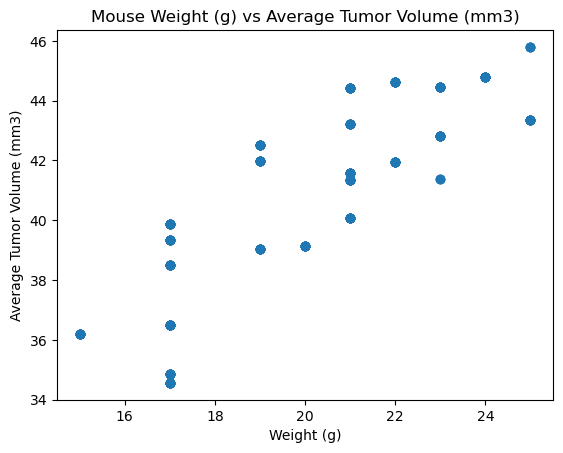

In [16]:
#Create a DataFrame that only returns records that are apart of the drug_type listed in the cell above
specific_drug_df = clean_df.loc[clean_df['Drug Regimen'] == drug_type]

#group the specific_drug_df by the mouse ID and the average tumor volume
avg_volume_df = specific_drug_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#merge the 2 dataframes above on the Mouse ID, this will create a Tumor Volume (mm3)_y that has our avg tumor size
complete_avg_df = pd.merge(specific_drug_df, avg_volume_df, on='Mouse ID')

#set our x and y axis to the weight and avg tumor volume respectively
x_axis = complete_avg_df['Weight (g)']
y_axis = complete_avg_df['Tumor Volume (mm3)_y']

#plot the data in a scatter chart
plt.scatter(x_axis,y_axis)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight (g) vs Average Tumor Volume (mm3)')

The correlation between mouse weight and tumor volume is 0.83


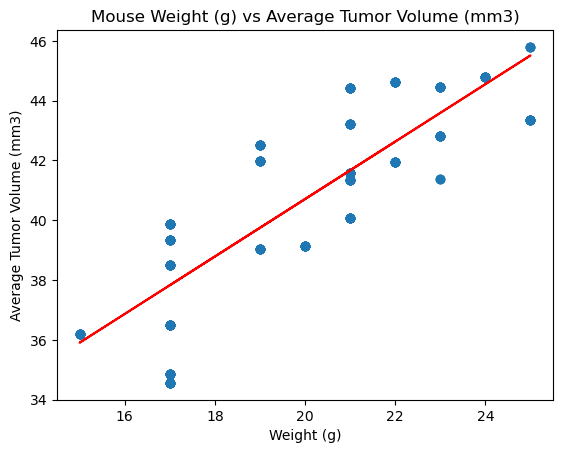

In [17]:
#below is our linregress syntax. This returns the slope, intercept, rvalue, pvalue,stderr
#for our x_axis and y_axis. Currently, we are only interested in Slope and Intercept
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
#y = Mx + b but in code, this calculates the 
regress_values = x_axis * slope + intercept
correlation = st.pearsonr(x_axis,y_axis)
plt.scatter(x_axis,y_axis)
plt.plot(x_axis, regress_values, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Mouse Weight (g) vs Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and tumor volume is {round(correlation[0],2)}')